<a href="https://colab.research.google.com/github/sarvessh45/skills-introduction-to-github/blob/main/AirBnb_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

uploaded = pd.read_excel('/content/Airbnb.xlsx')
print(uploaded.head())


        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  minimum nights  \
0  40.64749 -73.97237  United S

In [ ]:
uploaded

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN


In [ ]:
# Load the dataset
file_path = list(uploaded.keys())[0]  # take uploaded file name
df = pd.read_excel('/content/Airbnb.xlsx', sheet_name='in')


In [ ]:
# Clean column names
df.columns = [c.strip() for c in df.columns]

In [ ]:
# Different property types
room_types = df['room type'].dropna().unique().tolist()
print("Different property (room) types:", room_types)

Different property (room) types: ['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']


In [ ]:
# Neighborhood group counts
nbhd_counts = df['neighbourhood group'].fillna("Unknown").value_counts()
print("\nNeighbourhood group counts:\n", nbhd_counts.head(10))


Neighbourhood group counts:
 neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
Unknown             29
manhatan             1
brookln              1
Name: count, dtype: int64


In [ ]:
# Average price by neighbourhood group
price_by_group = df[['neighbourhood group','price']].dropna()
price_by_group = price_by_group[price_by_group['price'] > 0]
avg_price_group = price_by_group.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
print("\nAverage price by neighbourhood group:\n", avg_price_group)




Average price by neighbourhood group:
 neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


In [ ]:
# Relationship between construction year & price
df['Construction year'] = pd.to_numeric(df['Construction year'], errors='coerce')
valid_cy = df.dropna(subset=['Construction year','price'])
valid_cy = valid_cy[(valid_cy['Construction year'].between(1700,2025)) & (valid_cy['price']>0)]
cy_price_corr = valid_cy['Construction year'].corr(valid_cy['price'])
print("\nCorrelation between Construction year & Price:", cy_price_corr)



Correlation between Construction year & Price: -0.003753294648552591


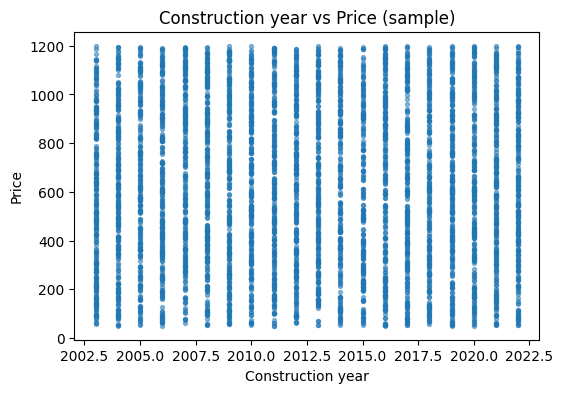

In [ ]:
plt.figure(figsize=(6,4))
sample_valid = valid_cy.sample(n=min(5000, len(valid_cy)), random_state=1)
plt.scatter(sample_valid['Construction year'], sample_valid['price'], s=8, alpha=0.5)
plt.title('Construction year vs Price (sample)')
plt.xlabel('Construction year')
plt.ylabel('Price')
plt.show()

In [ ]:
# Top 10 hosts
top_hosts = df.groupby('host name')['calculated host listings count'].max().dropna().sort_values(ascending=False).head(10)
print("\nTop 10 hosts by listing count:\n", top_hosts)


Top 10 hosts by listing count:
 host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64


In [ ]:
# Verified identity vs reviews
df['host_identity_verified'] = df['host_identity_verified'].fillna('Unknown')
verified_review = df.dropna(subset=['review rate number'])
mean_by_verified = verified_review.groupby('host_identity_verified')['review rate number'].mean()
print("\nAverage review rate by verification:\n", mean_by_verified)


Average review rate by verification:
 host_identity_verified
Unknown        3.236364
unconfirmed    3.271767
verified       3.286684
Name: review rate number, dtype: float64


In [ ]:

# Correlation price vs service fee
ps = df.dropna(subset=['price','service fee'])
ps = ps[(ps['price']>0) & (ps['service fee']>=0)]
price_service_corr = ps['price'].corr(ps['service fee'])
print("\nCorrelation Price vs Service fee:", price_service_corr)



Correlation Price vs Service fee: 0.9999908755543349


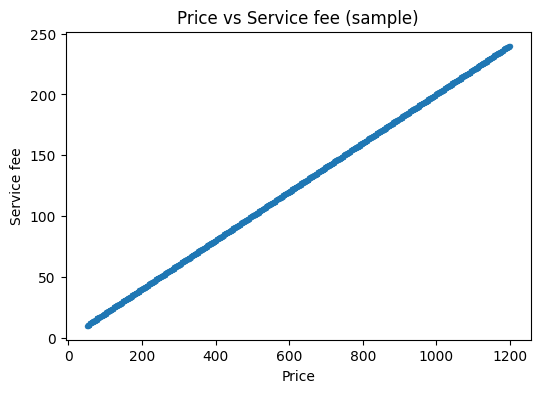

In [ ]:
plt.figure(figsize=(6,4))
sample_ps = ps.sample(n=min(5000, len(ps)), random_state=2)
plt.scatter(sample_ps['price'], sample_ps['service fee'], s=8, alpha=0.5)
plt.title('Price vs Service fee (sample)')
plt.xlabel('Price')
plt.ylabel('Service fee')
plt.show()


In [ ]:
# Average review by neighbourhood & room type
pivot_review = df[['neighbourhood group','room type','review rate number']].dropna()
pivot_table = pivot_review.pivot_table(
    index='neighbourhood group',
    columns='room type',
    values='review rate number',
    aggfunc='mean'
)
print("\nAverage review rate by neighbourhood group & room type:\n", pivot_table)



Average review rate by neighbourhood group & room type:
 room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                       3.346457         NaN      3.329706     3.264957
Brooklyn                    3.250378        3.75      3.264465     3.336983
Manhattan                   3.275807        3.50      3.277576     3.257459
Queens                      3.349154        3.75      3.315585     3.377778
Staten Island               3.329087         NaN      3.479482     3.533333
brookln                          NaN         NaN      4.000000          NaN
manhatan                         NaN         NaN      3.000000          NaN


In [ ]:
# Listings count vs availability
cc_avail = df[['calculated host listings count','availability 365']].dropna()
cc_avail = cc_avail[(cc_avail['calculated host listings count']>=0)&(cc_avail['availability 365']>=0)]
cc_avail_corr = cc_avail['calculated host listings count'].corr(cc_avail['availability 365'])
print("\nCorrelation host listings count vs availability:", cc_avail_corr)

cc_avail['host_listings_bin'] = pd.cut(cc_avail['calculated host listings count'],
                                       bins=[-0.1,1,3,10,50,500],
                                       labels=['0-1','2-3','4-10','11-50','51+'])
avg_avail_by_bin = cc_avail.groupby('host_listings_bin')['availability 365'].mean()
print("\nAverage availability by host listings bin:\n", avg_avail_by_bin)



Correlation host listings count vs availability: 0.1592620263143256

Average availability by host listings bin:
 host_listings_bin
0-1      115.302195
2-3      151.714478
4-10     206.537319
11-50    252.584082
51+      237.443955
Name: availability 365, dtype: float64


/tmp/ipython-input-101830700.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_avail_by_bin = cc_avail.groupby('host_listings_bin')['availability 365'].mean()
